In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error
import pydmd
import backtrader as bt
import yfinance as yf

import backtrader.analyzers as btanalyzers
from datetime import datetime
import backtrader.feeds as btfeeds
import math


In [58]:
sym = pd.read_csv("DATA/nse100_SYM.csv",header=None) 
sym = sym[0].tolist()
SYM =[ i + ".NS" for i in sym]

In [59]:
df = pd.DataFrame()
matx = pd.read_csv("DATA/NSE100.csv",header=None) #VARIABLE 1
matx = pd.DataFrame(matx.transpose())
matx = matx.fillna(0)

In [60]:
# function returns the index of the stock in the matrix
def get_index(sym):
    return SYM.index(sym)
    

In [61]:
def dmd_pred(j,i=12) :
    # creating the matrix mat 
    # i days are trained j th day from last 
    mat = matx.iloc[:, -(i)+j:j]
    mat=mat.to_numpy()


    # dmd 
    dmd = pydmd.DMD(svd_rank=mat.shape[1])
    dmd.fit(mat)
    d_ind = np.argmax(np.abs(dmd.amplitudes.real))


    # if any(np.abs(dmd.eigs.real)>1) and dmd.amplitudes.real[d_ind] > 0 :
    if np.abs(dmd.eigs.real[d_ind])>1 and dmd.eigs.imag[d_ind] == 0 and dmd.amplitudes.real[d_ind] > 0 :
        d_ind = np.argsort(dmd.modes[:,d_ind].real)[-5:]
        return (True,d_ind)
 
        
 
    else:
        return (False,[0 ,0 ,0 ,0 ,0])



In [83]:
def portfolio(i,max) :
    cash = 1000000
    portfolio = []
    st1 = 0
    st2 = 0
    st3 = 0
    st4 = 0
    st5 = 0
    invest = True
    for j in range(max+2,len(matx.columns)):
        if dmd_pred(j)[0]:
            if invest == True:
                p = dmd_pred(j,i)
                p=p[1]
                s1 = matx[j][p[0]]
                s2 = matx[j][p[1]]
                s3 = matx[j][p[2]]
                s4 = matx[j][p[3]]
                s5 = matx[j][p[4]]
                st1 = math.floor((cash/5)/s1)
                st2 = math.floor((cash/5)/s2)
                st3 = math.floor((cash/5)/s3)
                st4 = math.floor((cash/5)/s4)
                st5 = math.floor((cash/5)/s5)

                cas = cash - st1*s1- st2*s2- st3*s3- st4*s4- st5*s5
                invest = False

        else :
            if st1 != 0:
                s1 = matx[j][p[0]]
                s2 = matx[j][p[1]]
                s3 = matx[j][p[2]]
                s4 = matx[j][p[3]]
                s5 = matx[j][p[4]]
                
                cash = cas + st1*s1+ st2*s2+ st3*s3+ st4*s4+ st5*s5
                st1 = 0
                invest = True
        
        portfolio.append(cash)

    performace = (cash/1000000)*100
    print(i," -->  PERFORMANCE :" , performace)
    return (portfolio,performace)



In [89]:
max = 20
port=[]
perf=[]
for i in range(2,max):
    P = portfolio(i,max)
    perf.append(P[0])
    port.append(P[1])


2  -->  PERFORMANCE : 161.84580499999996
3  -->  PERFORMANCE : 110.02186000000032
4  -->  PERFORMANCE : 130.54254499999988
5  -->  PERFORMANCE : 99.33926500000034
6  -->  PERFORMANCE : 134.50693500000014
7  -->  PERFORMANCE : 110.62116000000002
8  -->  PERFORMANCE : 162.3187150000002
9  -->  PERFORMANCE : 118.37758500000018
10  -->  PERFORMANCE : 162.22255000000024
11  -->  PERFORMANCE : 163.6236150000001
12  -->  PERFORMANCE : 154.43008500000036
13  -->  PERFORMANCE : 138.1187649999997
14  -->  PERFORMANCE : 109.28520500000005
15  -->  PERFORMANCE : 156.55632500000002
16  -->  PERFORMANCE : 170.18520000000075
17  -->  PERFORMANCE : 99.24087000000003
18  -->  PERFORMANCE : 103.95512000000011
19  -->  PERFORMANCE : 92.07079500000013


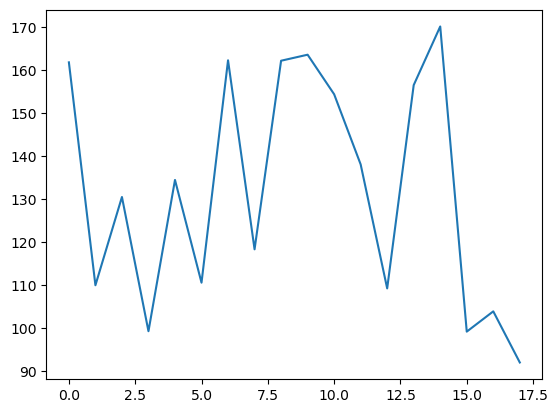

In [87]:
plt.plot(port)

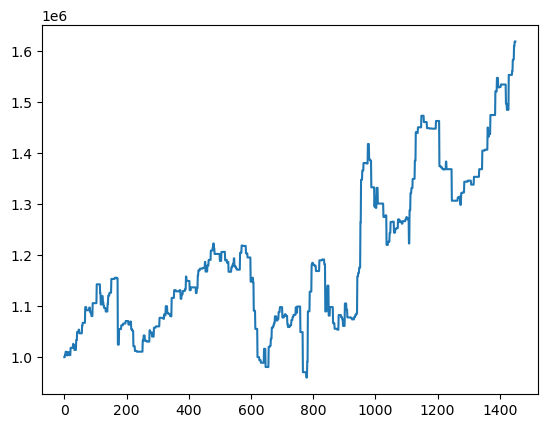

In [96]:
plt.plot(perf[0])

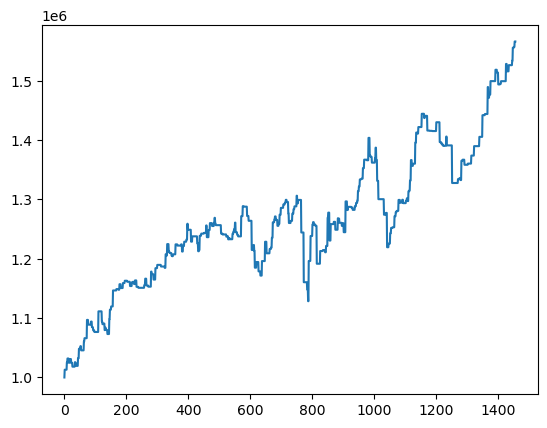

In [ ]:
plt.plot(portfolio)